<a href="https://colab.research.google.com/github/parveen78/OIBSIP-/blob/main/Diwali_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


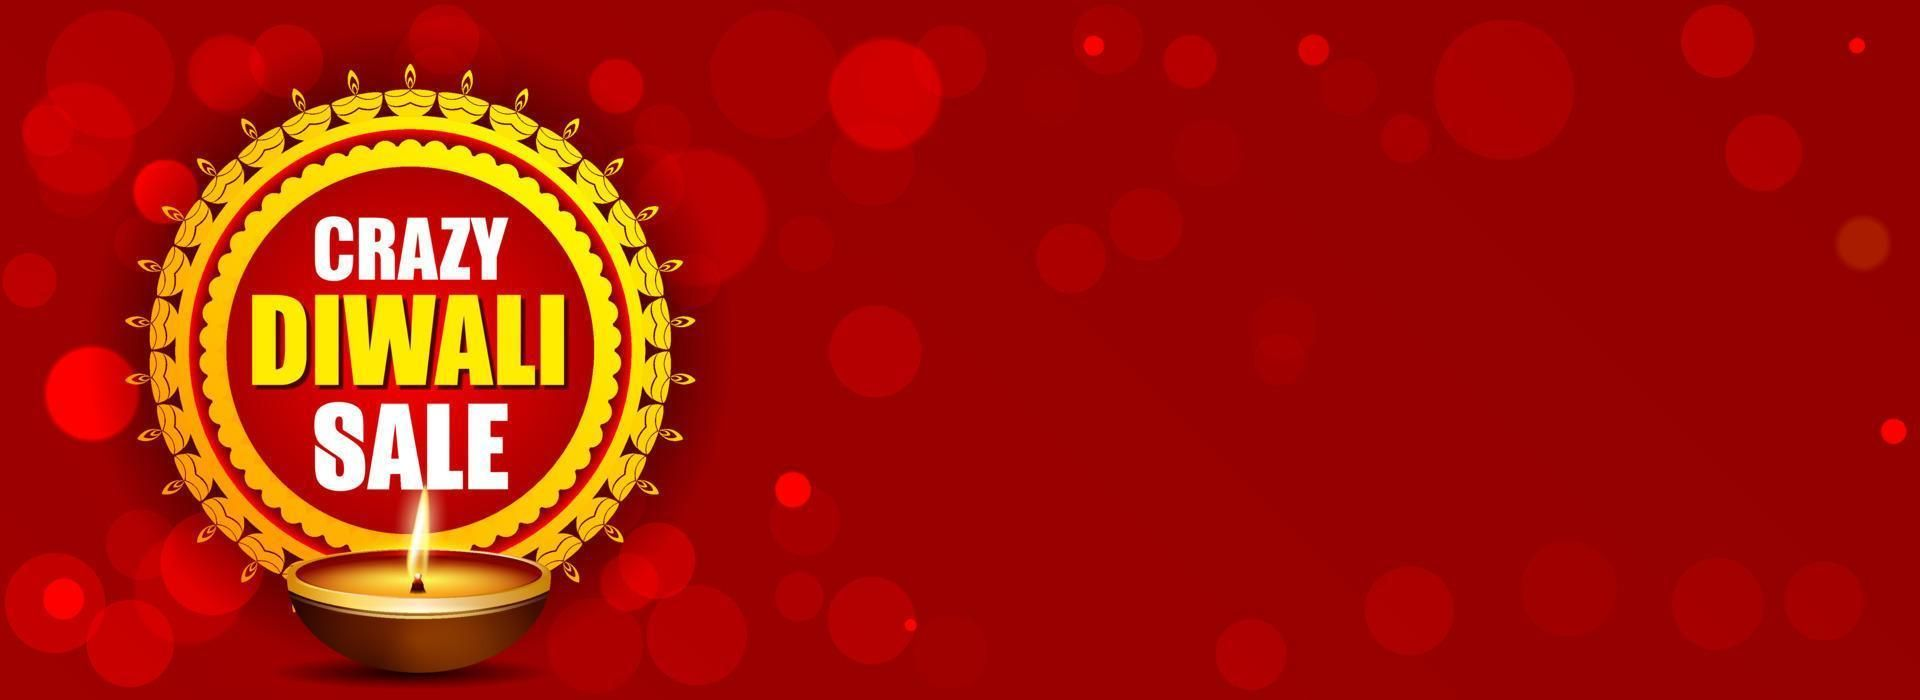

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Diwali_sale=pd.read_csv("Diwali Sales Data.csv",encoding="unicode_escape")

In [3]:
Diwali_sale.shape

(11251, 15)

In [4]:
Diwali_sale.head() # it show the top rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
Diwali_sale.info() # it give information about whole dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# so we don't need the column(Status,Unnamed) hence we drop it.
Diwali_sale.drop(["Status","unnamed1"],axis=1,inplace=True)

In [7]:
Diwali_sale.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
Diwali_sale.dropna(inplace=True)

In [9]:
Diwali_sale.shape

(11239, 13)

In [10]:
Diwali_sale["Amount"]=Diwali_sale["Amount"].astype("int")

In [11]:
Diwali_sale["Amount"].dtype

dtype('int64')

In [12]:
Diwali_sale.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
#rename the martial status as shadi
Diwali_sale.rename(columns={"Marital_Status":"Shadi"})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [14]:
# Describe give the description of numerical columns (count,min,max)
Diwali_sale[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#Exploratary Data Analysis

#Gender

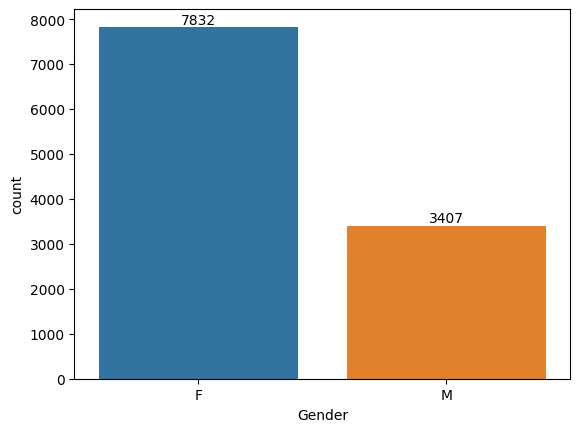

In [15]:
ax=sns.countplot(x="Gender",data=Diwali_sale)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

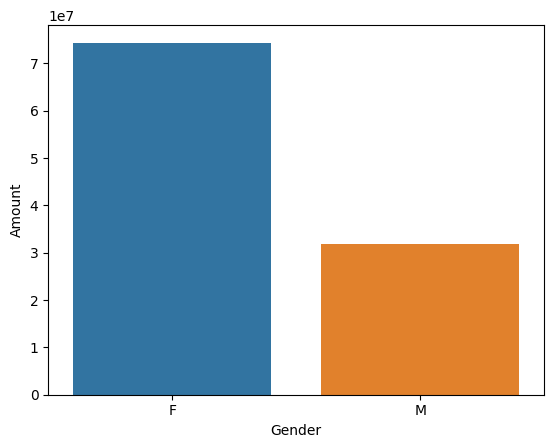

In [16]:
Sales_gender=Diwali_sale.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Gender",y="Amount",data=Sales_gender)

**So from this Visulaiszation we can clearly see that most of buyer are Female.They purchased more than Male...**


#AGE

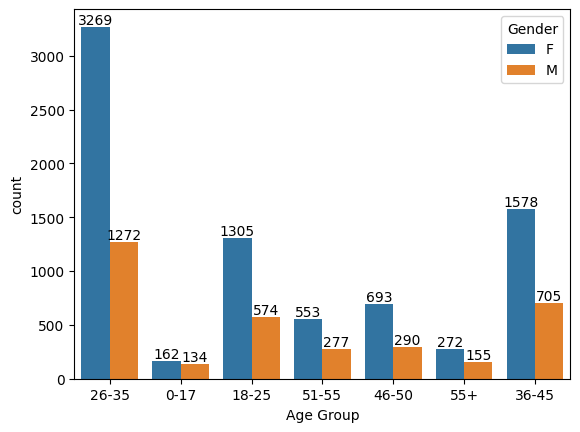

In [20]:
ax=sns.countplot(data=Diwali_sale,x="Age Group",hue="Gender")

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

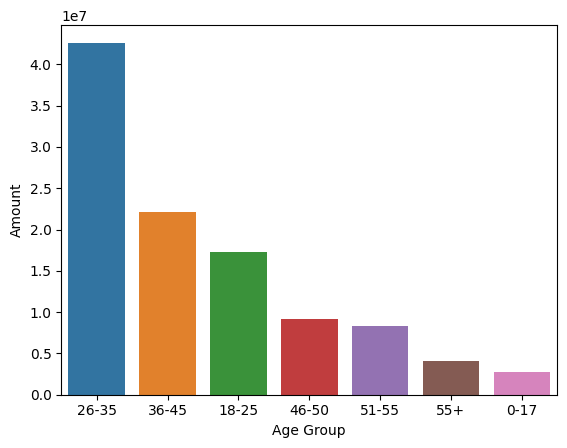

In [21]:
sale_gen_age=Diwali_sale.groupby(["Age Group"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x="Age Group",y="Amount",data=sale_gen_age)


**So from this we can cleary see that the age group between 26-35 female purchase more Products during diwali...**

<Axes: xlabel='State', ylabel='Orders'>

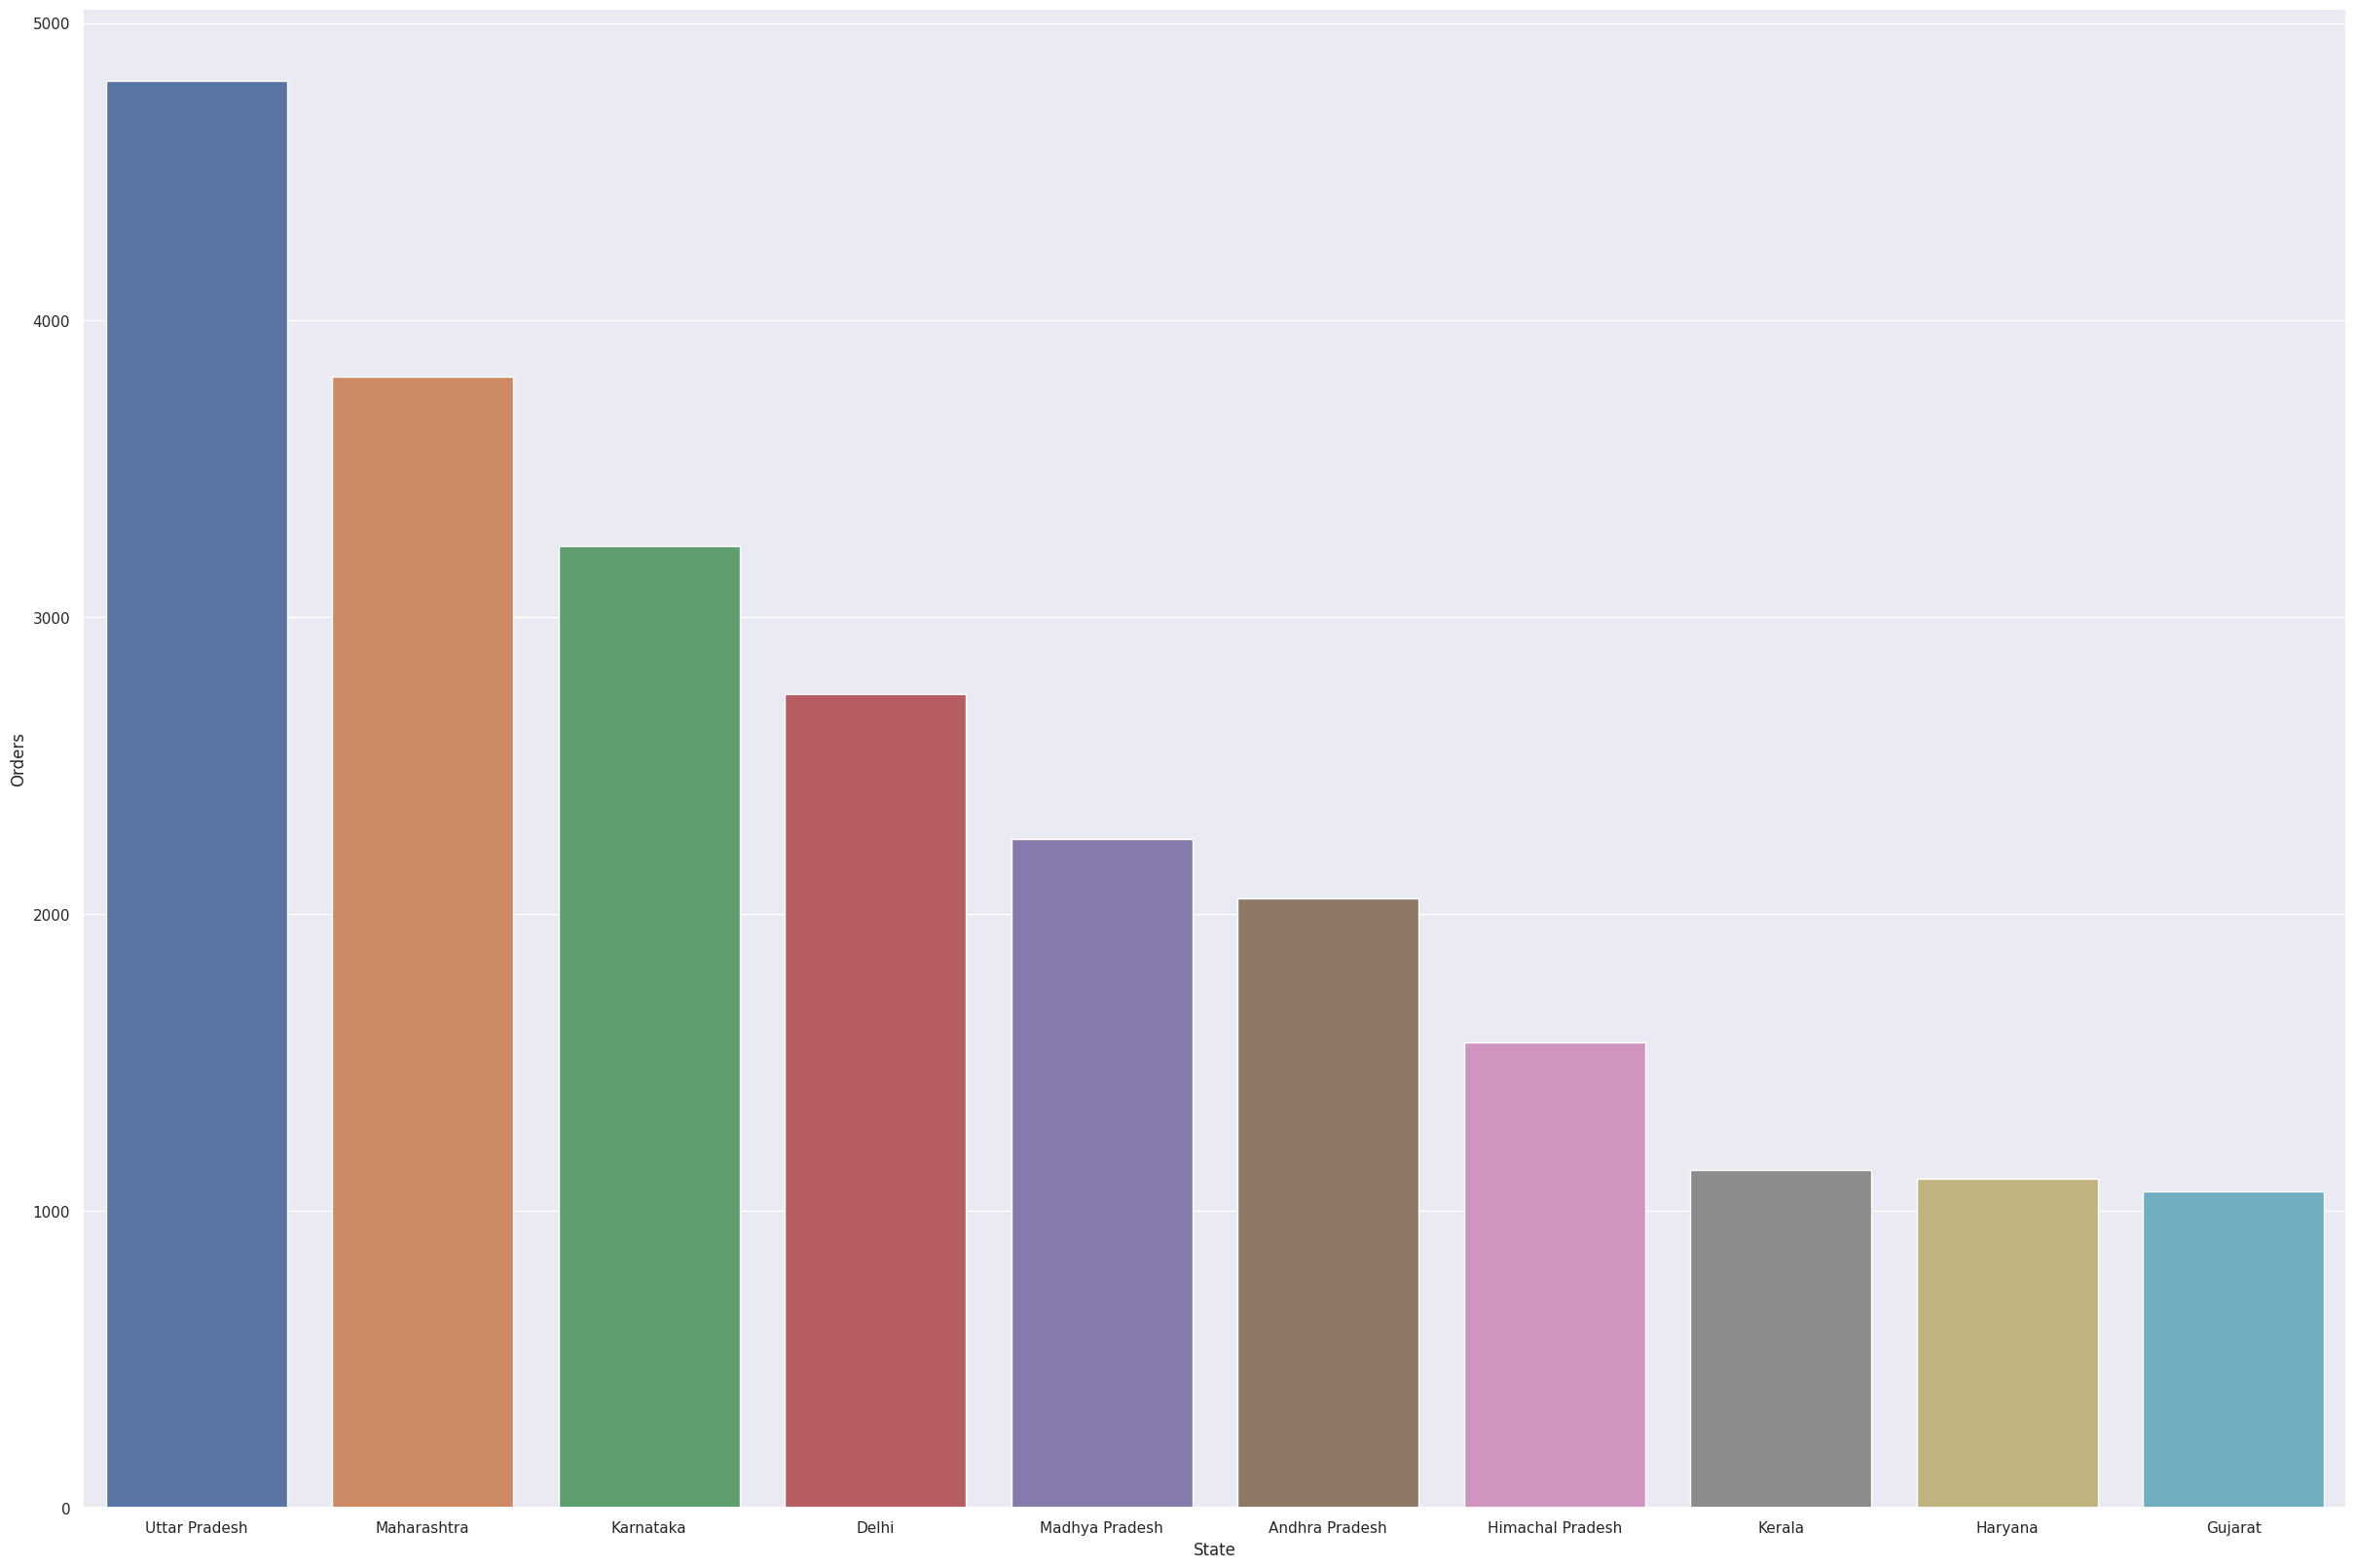

In [28]:
# Top 10 state/order
from matplotlib import rc
State_orders=Diwali_sale.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,20)}) #it set the graph size
sns.barplot(x="State",y="Orders",data=State_orders)

<Axes: xlabel='State', ylabel='Amount'>

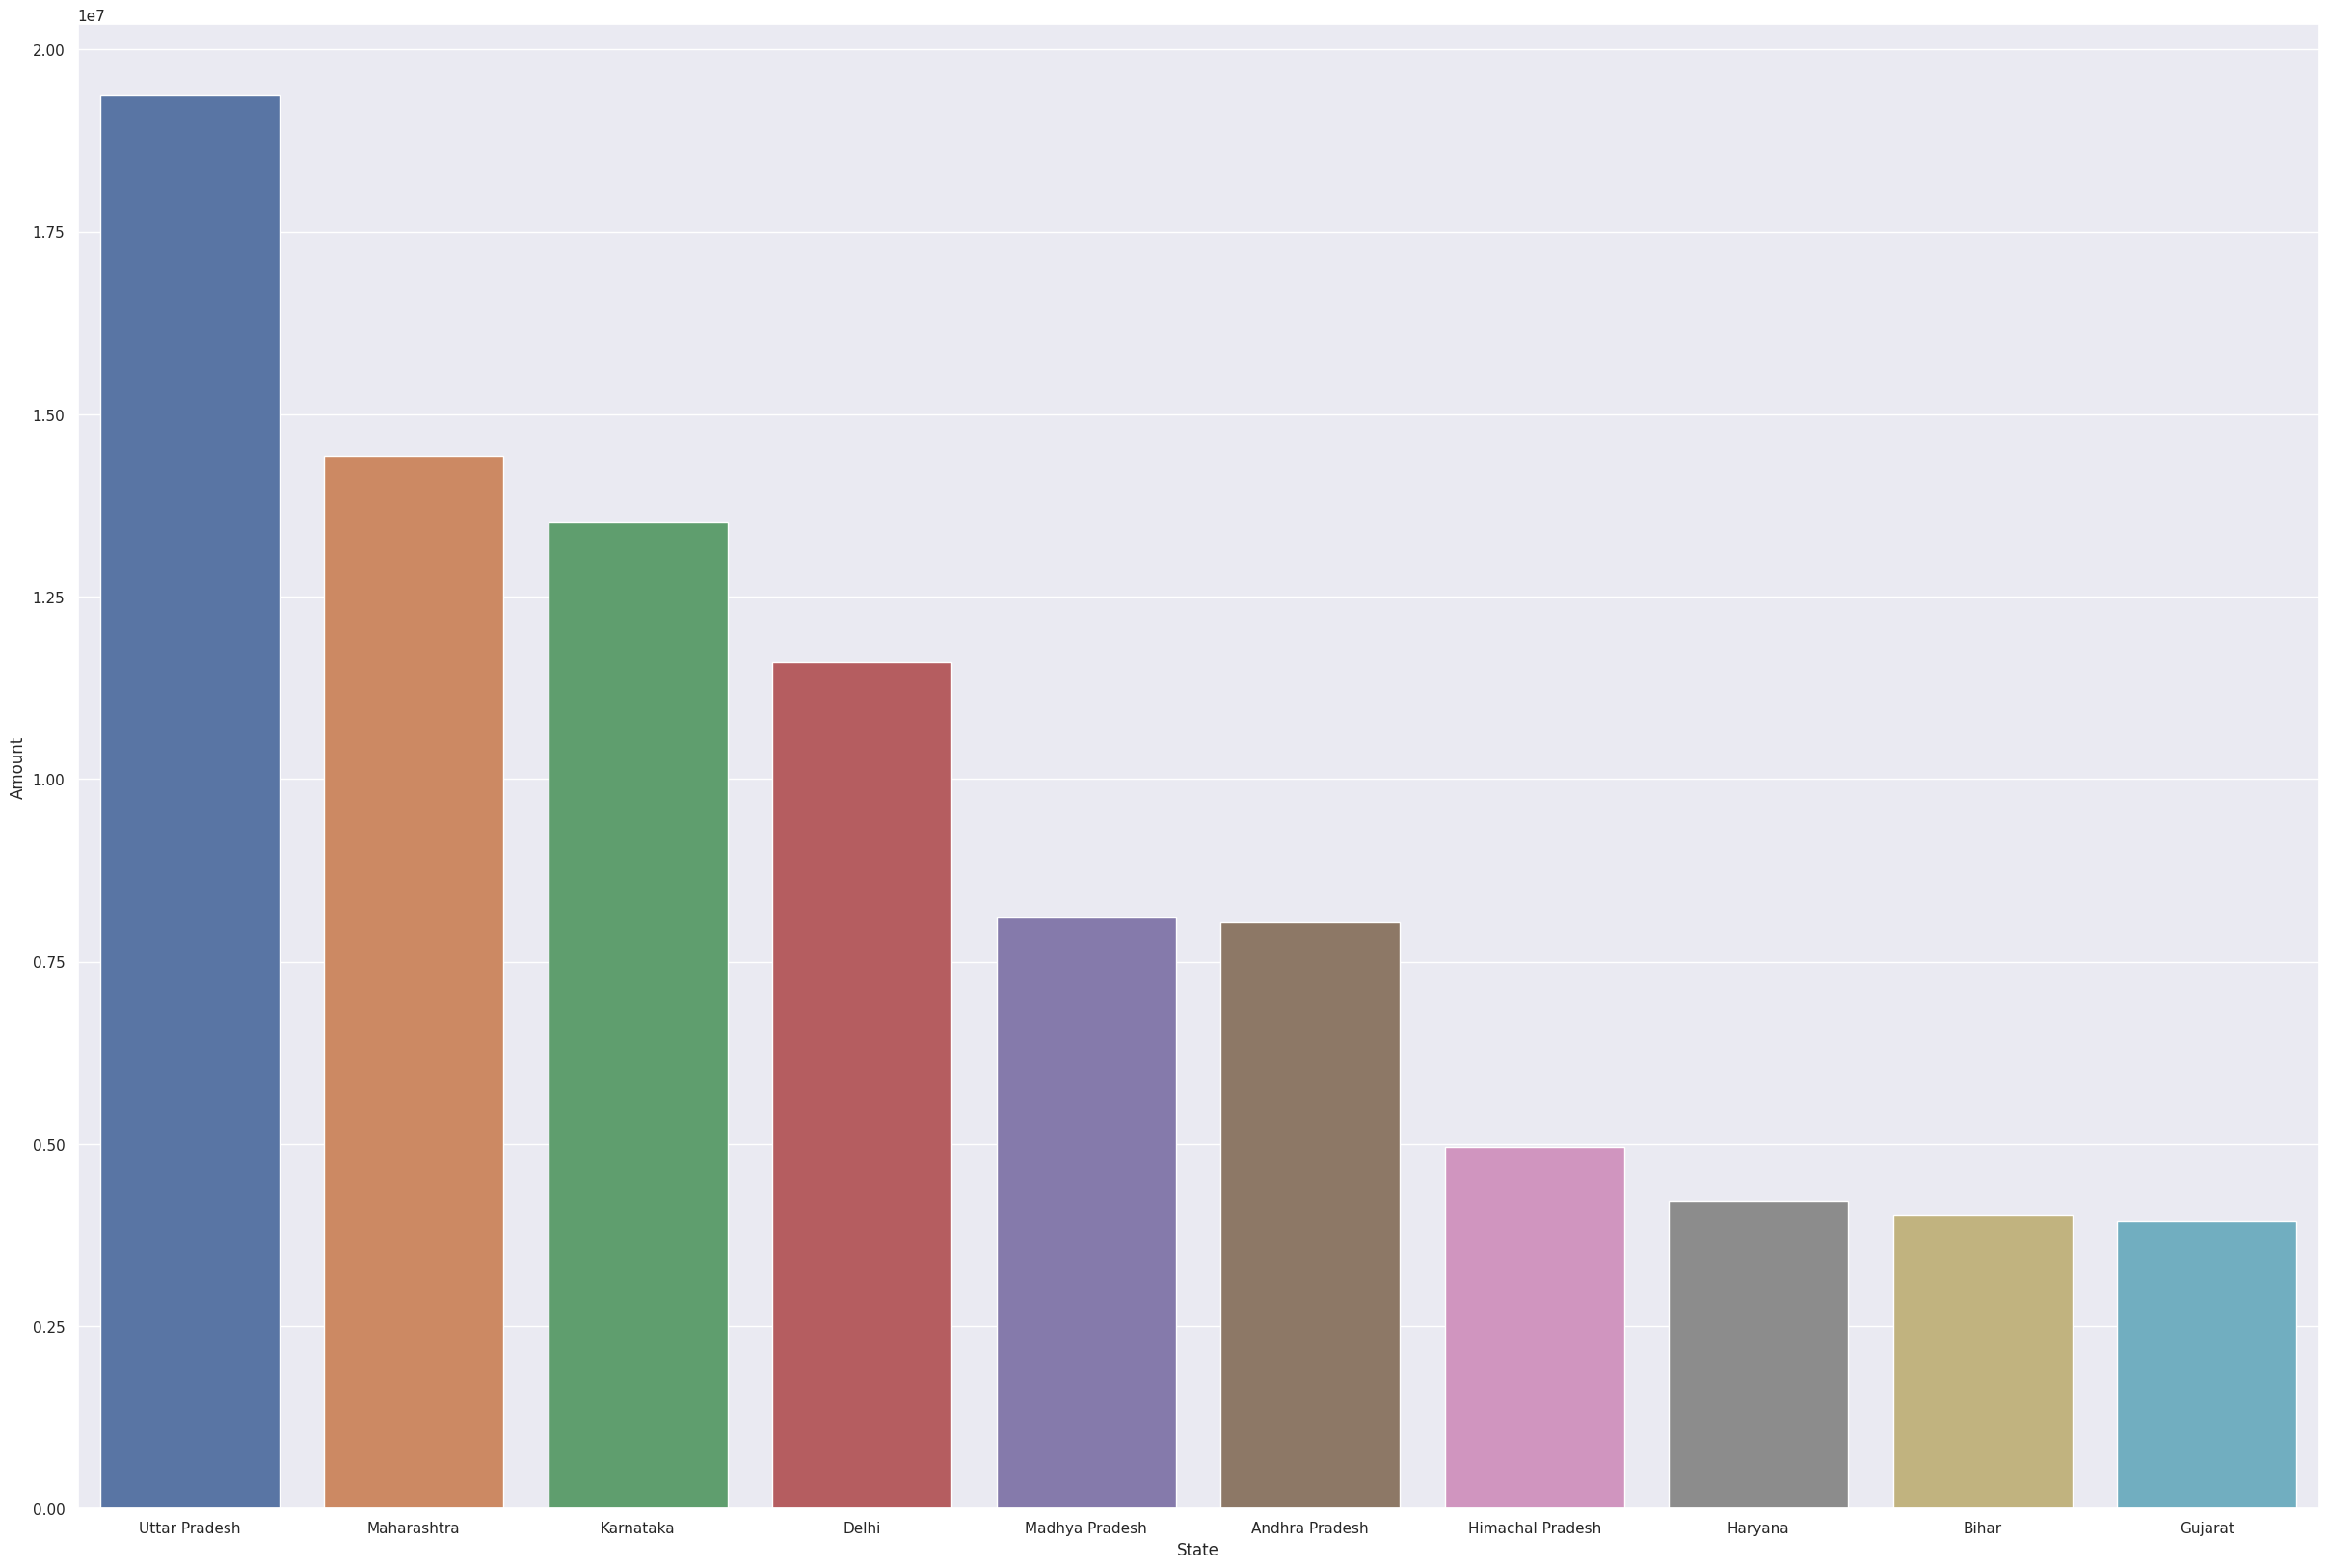

In [29]:
# Top 10 state/Amount
State_orders=Diwali_sale.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc={'figure.figsize':(30,20)})
sns.barplot(x="State",y="Amount",data=State_orders)

**From this we can say that the people from Uttarpradesh, maharastra, Karnataka had do more orders and these 3 state buy more products also..**

#Marrital status

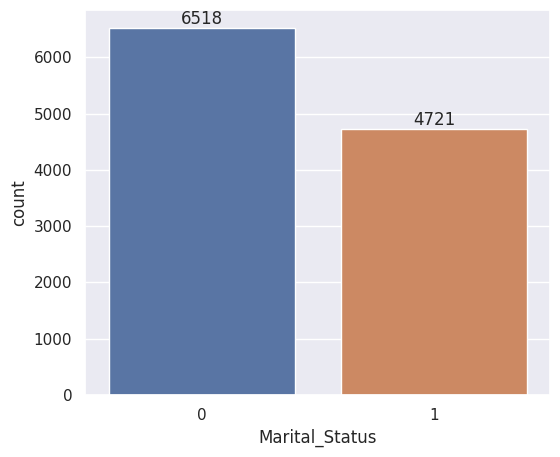

In [33]:
ax=sns.countplot(x="Marital_Status",data=Diwali_sale)
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

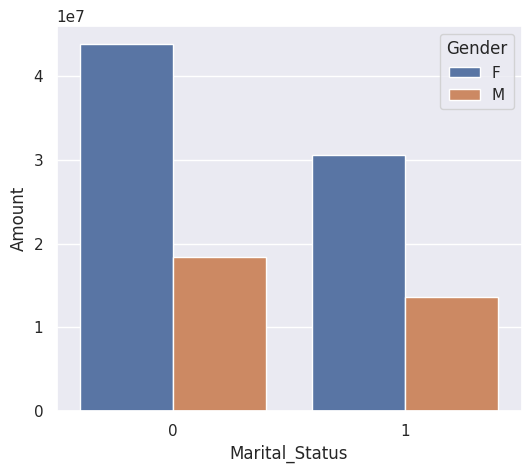

In [38]:
marital_sale=Diwali_sale.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=marital_sale,hue='Gender')

**so we can say that most are married women that have spent high purchase amount in shopping..**


#Occupations

In [39]:
Diwali_sale.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

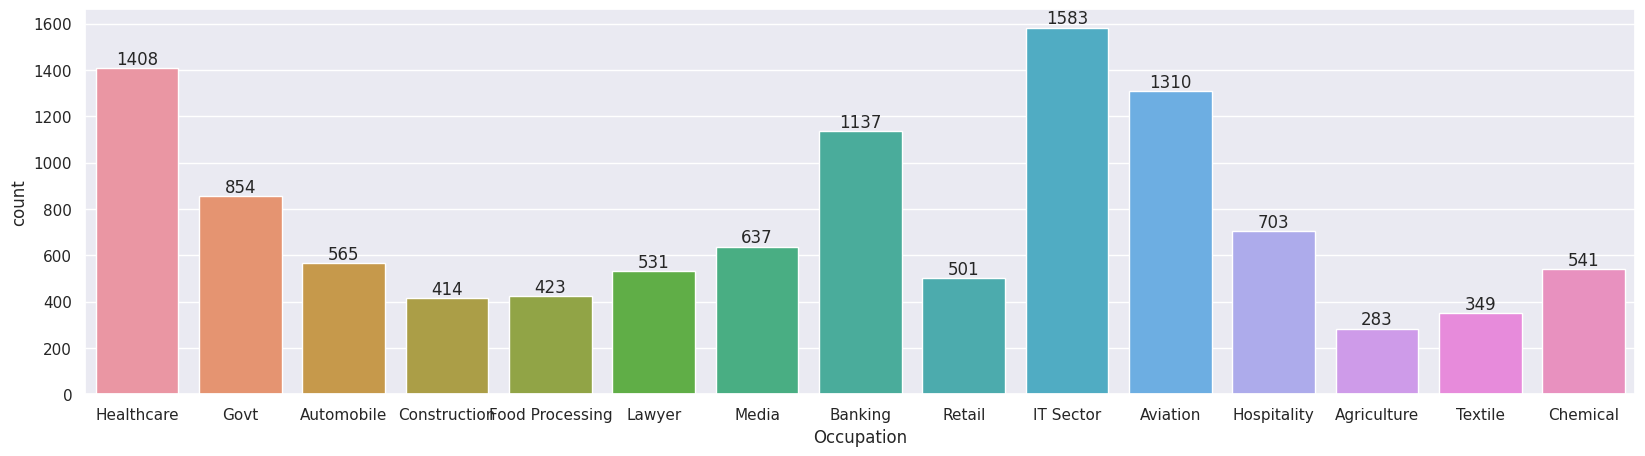

In [43]:
ax=sns.countplot(x="Occupation",data=Diwali_sale)
sns.set(rc={'figure.figsize':(20,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

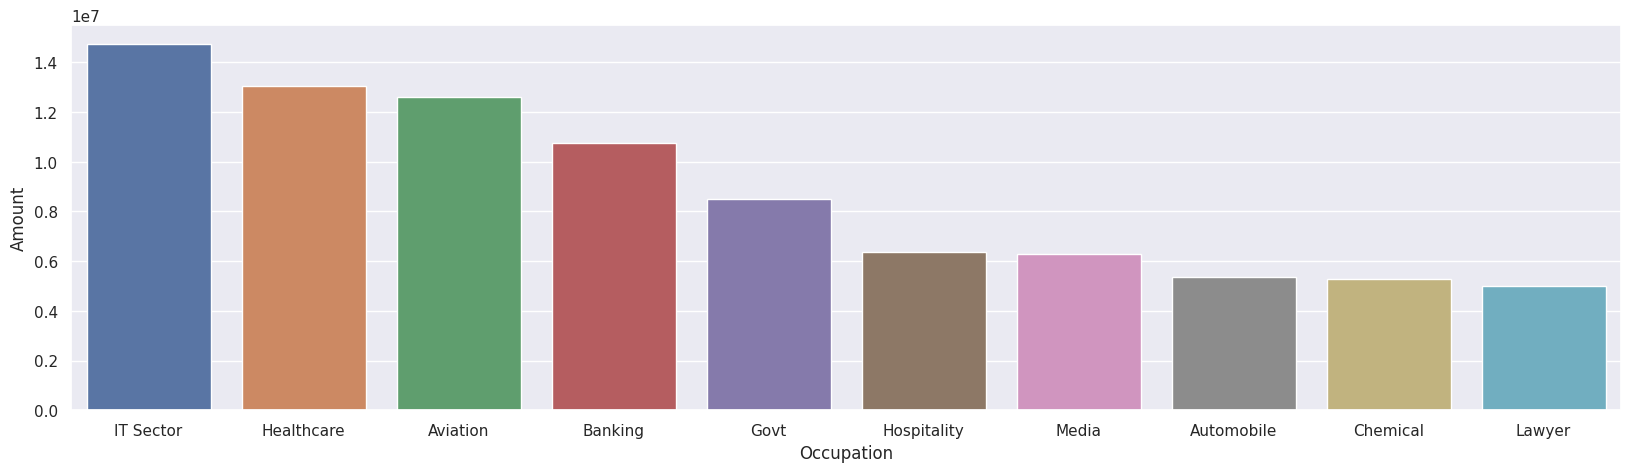

In [47]:
Sale_occup=Diwali_sale.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x="Occupation",y="Amount",data=Sale_occup)

**So from this bar graph chart we can clearly say that the Occupation of  female purchaser are from IT sector,Health care,Aviation....**

#Product_category

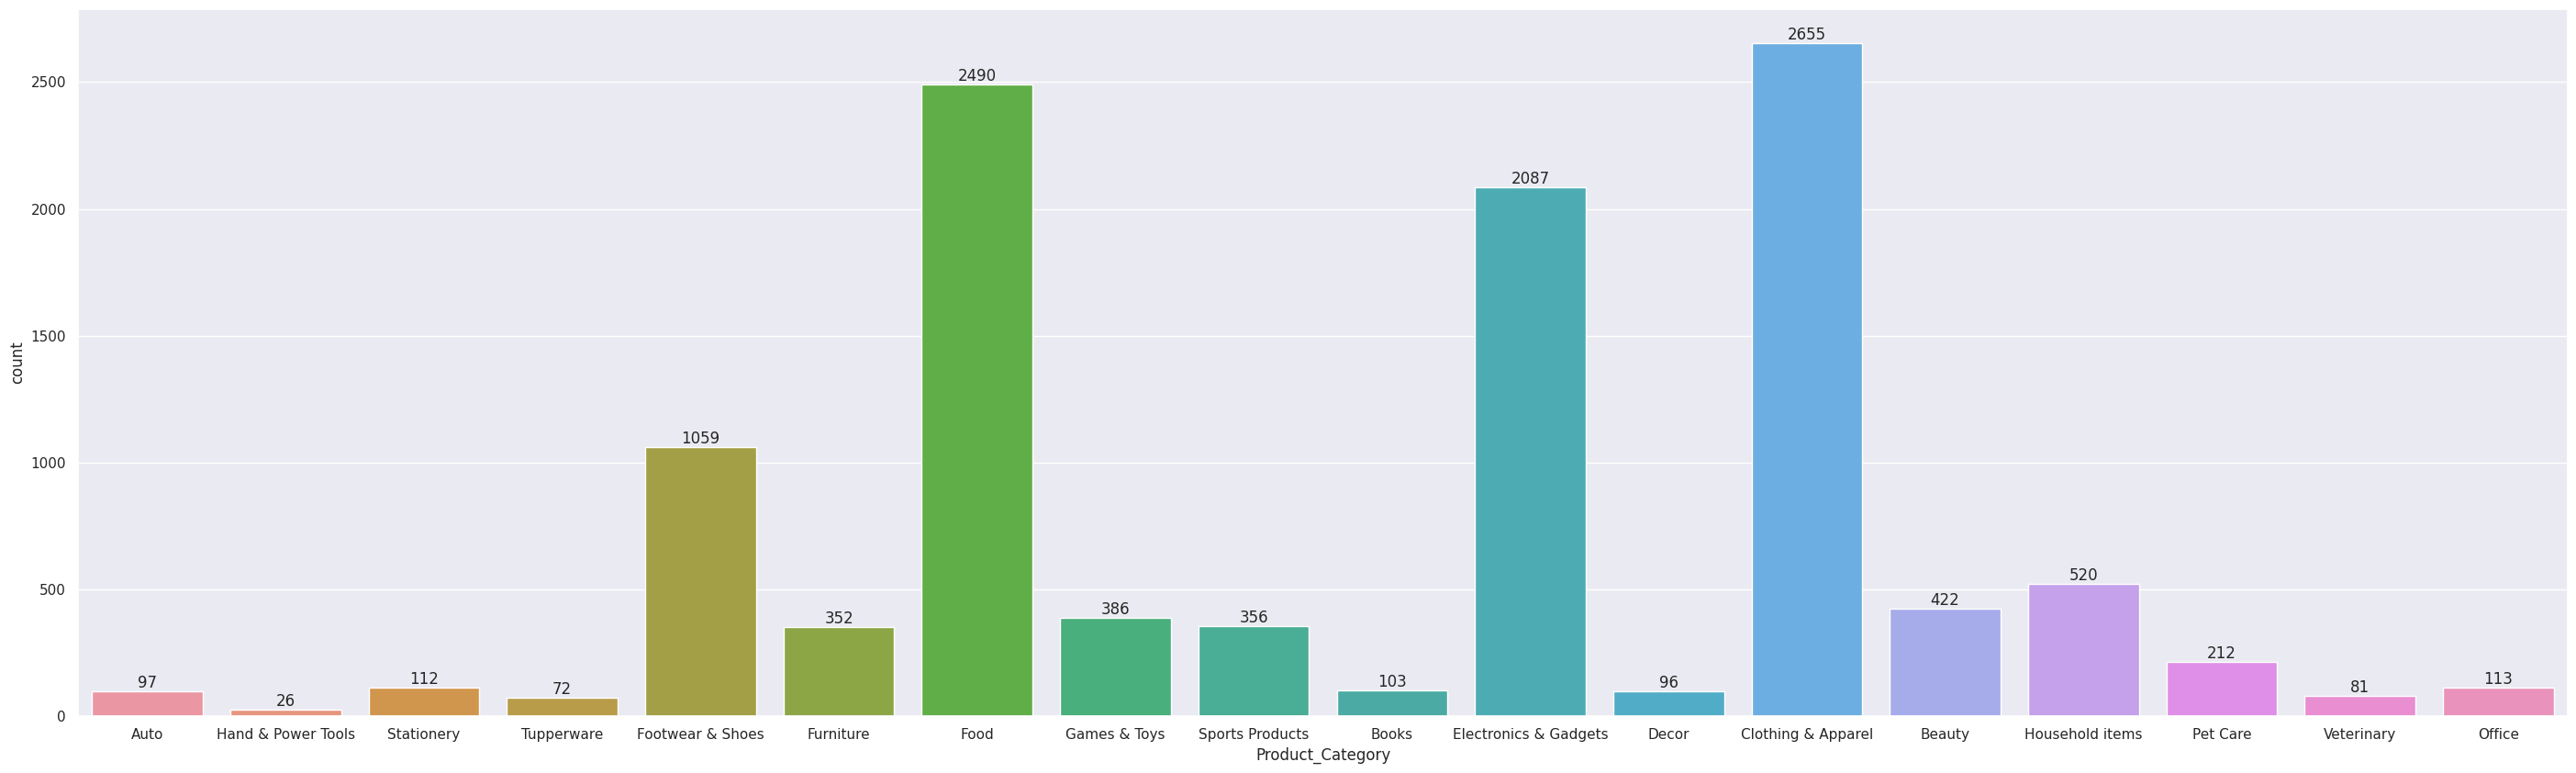

In [53]:
ax=sns.countplot(x="Product_Category",data=Diwali_sale)
sns.set(rc={'figure.figsize':(20,40)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

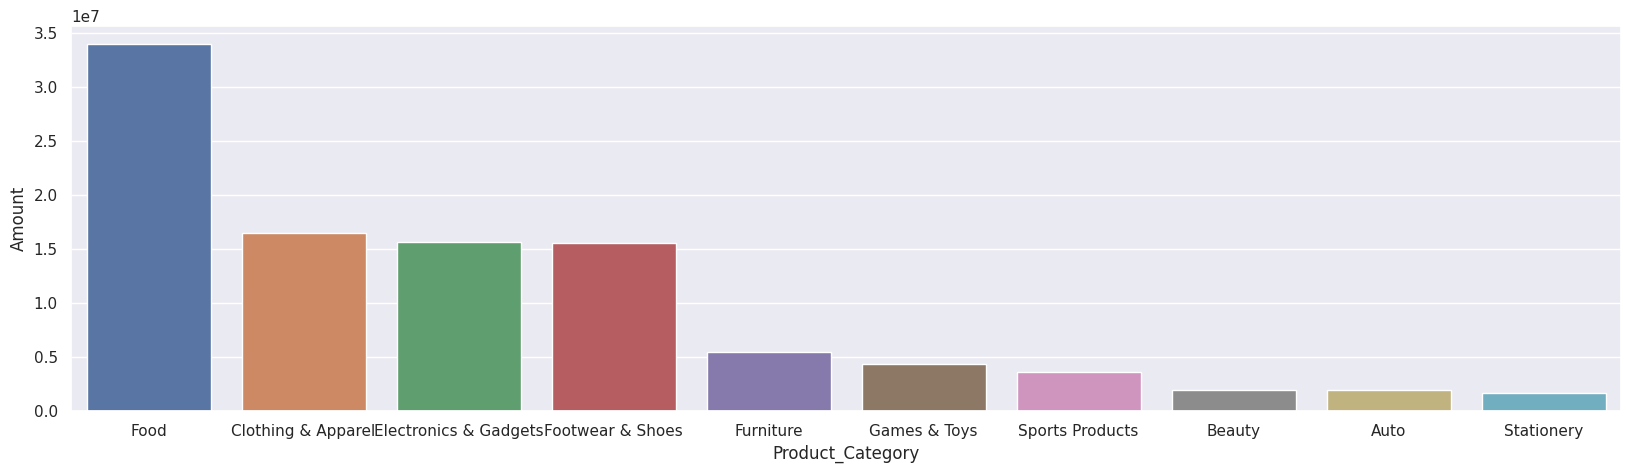

In [59]:
Sale_occup=Diwali_sale.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x="Product_Category",y="Amount",data=Sale_occup)

**After this Visulaization we can clearly see that the most of sold products are from food, Clothing and Electronics Gadget  During Diwali...**

<Axes: xlabel='Product_ID', ylabel='Amount'>

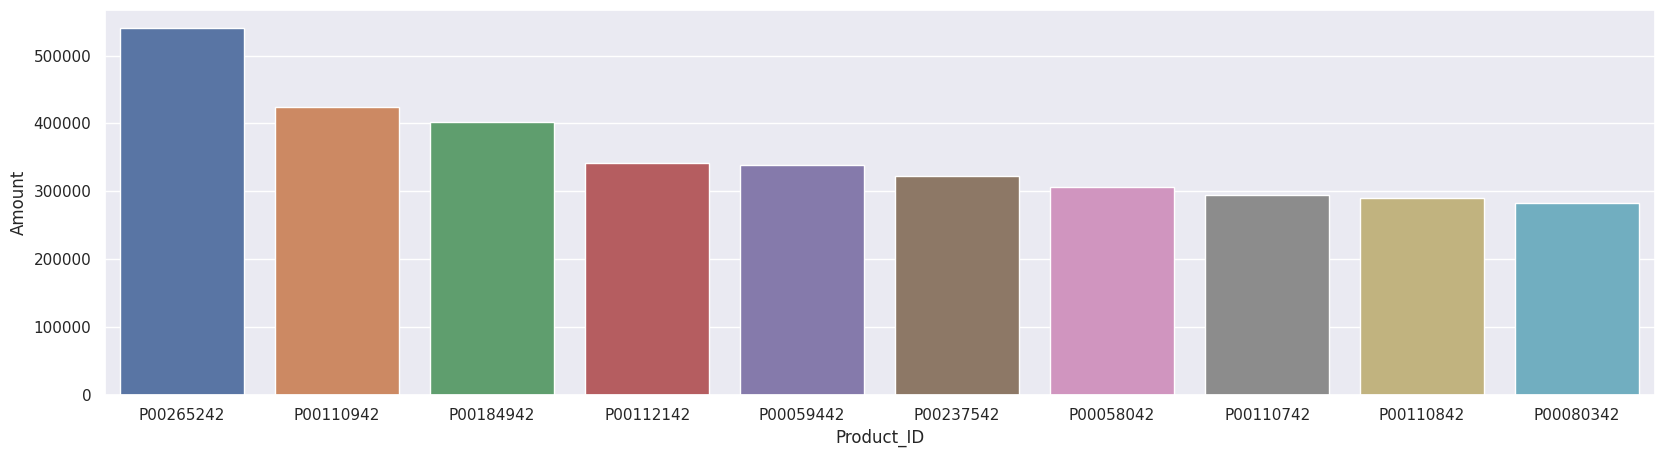

In [60]:
Sale_occup=Diwali_sale.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x="Product_ID",y="Amount",data=Sale_occup)

**So from this Visulaization we can say that the most product sold of product id is P00265242,P00110942**

#Conclusion

**SO from this Analysis the Outcomes are most females have high purchasing product.basically by occupation they are from IT,Health sector and aviation industry and from Uttarpardesh,Maharastra and karnataka..**